# Kernel Ridge Regression
This notebook takes the full data scaled to zero mean and unit variance and the PCA reduced data and trains a Kernel Ridge Regressor for both datasets.

In [47]:
import numpy as np
import matplotlib.pyplot as plt

In [48]:
pca_data = np.load("../data/X_pca.npy")
scaled_data = np.load("../data/X_scaled.npy")
Y = np.load("../data/y.npy")

In [79]:
train_size = 8000

pca_train = pca_data[:train_size, :]
pca_val = pca_data[train_size:, :]
scaled_train = scaled_data[:train_size, :]
scaled_val = scaled_data[train_size:, :]
y_train = Y[:train_size]
y_val = Y[train_size:]

### Create RBF kernel function
Utillizes the fact that $(x-x')^2=||x||^2+||x'||^2-2x^Tx'$, 
https://www.youtube.com/watch?v=nJz_lazAUqw

In [80]:
def rbf_kernel(x1, x2, gamma):
    x1_sq = np.sum(x1**2, axis=1).reshape(-1, 1)
    x2_sq = np.sum(x2**2, axis=1).reshape(1, -1)
    return np.exp(-gamma * (x1_sq + x2_sq - 2*x1@x2.T))


def train_rbf(x, y, gamma, lambd):
    K = rbf_kernel(x, x, gamma)
    n = K.shape[0]
    alpha = np.linalg.solve(K + lambd * np.eye(n), y)
    return alpha


def predict_rbf(x, z, alpha, gamma):
    k = rbf_kernel(x, z, gamma)
    return k.T @ alpha


In [81]:
best_gamma = None
best_lambda = None
best_MAE = np.inf
gamma_values = [0.01, 0.1, 1, 10]
lambda_values = [1e-3, 1e-2, 1e-1, 1]
for gamma in gamma_values:
    for lambd in lambda_values:
        alpha = train_rbf(scaled_train, y_train, gamma, lambd)
        predictions = predict_rbf(scaled_train, scaled_val, alpha, gamma)
        mean_error = np.sum(np.abs(y_val - predictions))/ len(y_val)
        if mean_error < best_MAE:
            best_gamma = gamma
            best_lambda = lambd
            best_MAE = mean_error

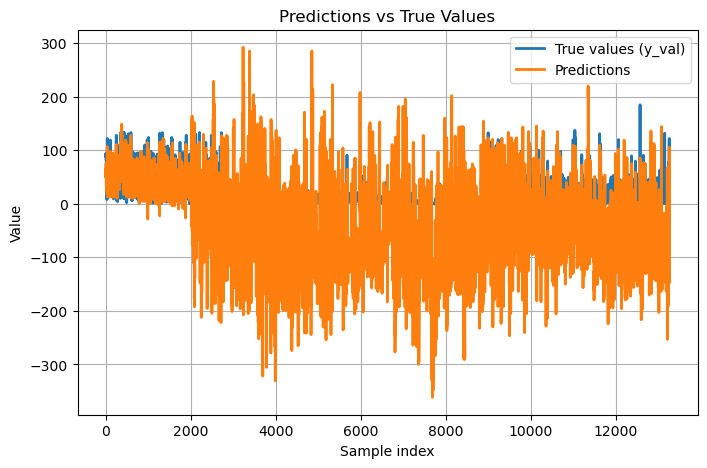

The absolute mean error is: 9.857950057617773


In [90]:
def plot_predictions(y_val, y_pred):
    plt.figure(figsize=(8, 5))

    # Plot true values
    plt.plot(y_val, label="True values (y_val)", linewidth=2)

    # Plot predictions
    plt.plot(y_pred, label="Predictions", linewidth=2)

    plt.xlabel("Sample index")
    plt.ylabel("Value")
    plt.title("Predictions vs True Values")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_predictions(y_val, predictions)
print("The absolute mean error is:", best_MAE)

### Linear Regression with L2 regularization

In [91]:
def linear_regression_weight(x, y, lambd):
    n = x.shape[1]
    w = np.linalg.solve(x.T@x+lambd*np.eye(n), x.T@y)
    return w
def linear_regression(z, w):
    return z@w

In [92]:
lambda_values = [1e-3, 1e-2, 1e-1, 1]
best_lambda = None
best = np.inf
for lambd in lambda_values:
    w = (linear_regression_weight(scaled_train, y_train, lambd))
    predictions = linear_regression(scaled_val, w)
    score = np.sum(np.abs(y_val - predictions))/ len(y_val)
    if score < best:
        best = score
        best_lambda = lambd

print("The absolute mean error is:", best)

The absolute mean error is: 67.86635224804382
